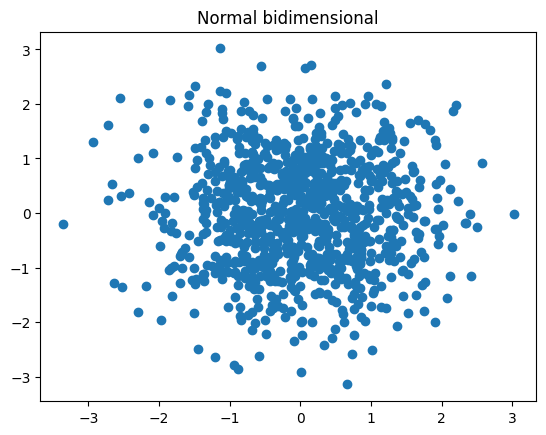

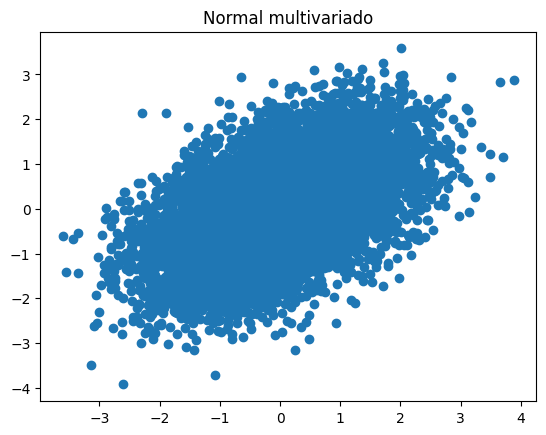

autovalores = [1.5 0.5], autovectores = [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


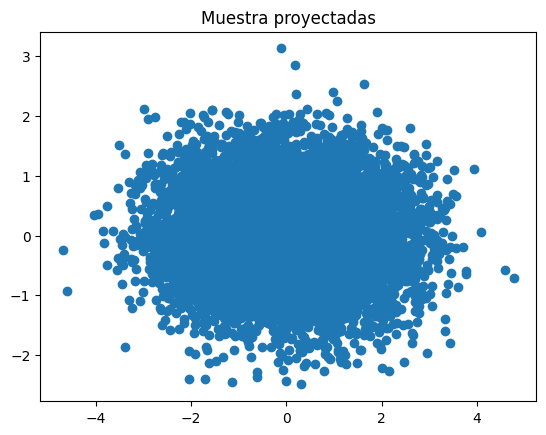

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import random


media = np.array([0,0])
covarianza = [[1,0.5], [0.5, 1]]  #los valores que no están en diagonal izquierda definen correlación positiva o negativa

cant = 10000


def box_muller(muestras):
    u1 = np.random.uniform(0,1,muestras)
    u2 = np.random.uniform(0,1, muestras)
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    return z1, z2

z1,z2 = box_muller(1000)
plt.scatter(z1,z2)
plt.title("Normal bidimensional")
plt.show()


normal = np.random.multivariate_normal(media, covarianza, cant)
bidimensional_norm = stats.multivariate_normal(media, covarianza)
#plt.plot(normal[:,0], normal[:,1])
""" x,y = bidimensional_norm.rvs(cant).T
plt.scatter(x,y)
plt.show() """
plt.scatter(normal[:,0], normal[:,1])
plt.title("Normal multivariado")
plt.show()

autovalores, autovectores = np.linalg.eig(covarianza)
print(f"autovalores = {autovalores}, autovectores = {autovectores}")
muestras_proy = normal @ autovectores
plt.scatter(muestras_proy[:,0], muestras_proy[:,1])
plt.title("Muestra proyectadas")
plt.show()


blanqueo = np.linalg.inv(np.sqrt(np.diag(autovalores)))
muestras_proy_blanqueados = muestras_proy @ blanqueo

plt.scatter(muestras_proy_blanqueados[:,0], muestras_proy_blanqueados[:,1])
plt.title("Muestra proyecatadas con blanqueo")
plt.show()
